# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {"q": city, "units": "metric", "APPID": weather_api_key}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params = city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quatre cocos
Processing Record 2 of Set 1 | pervomayskoye
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | poronaysk
Processing Record 9 of Set 1 | oktyabr'skoye
Processing Record 10 of Set 1 | revda
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | illizi
Processing Record 13 of Set 1 | choyr
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | verdal
Processing Record 16 of Set 1 | kapuskasing
Processing Record 17 of Set 1 | crane
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | la gi
Processing Record 22 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quatre cocos,-20.2078,57.7625,21.72,63,54,9.66,MU,1724771569
1,pervomayskoye,43.9190,46.7102,28.80,30,90,6.61,RU,1724771570
2,wailua homesteads,22.0669,-159.3780,23.75,84,75,7.20,US,1724771572
3,palmer,42.1584,-72.3287,26.29,57,0,1.52,US,1724771573
4,edinburgh of the seven seas,-37.0676,-12.3116,10.39,68,100,8.17,SH,1724771574


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label = "City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col = "City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quatre cocos,-20.2078,57.7625,21.72,63,54,9.66,MU,1724771569
1,pervomayskoye,43.9190,46.7102,28.80,30,90,6.61,RU,1724771570
2,wailua homesteads,22.0669,-159.3780,23.75,84,75,7.20,US,1724771572
3,palmer,42.1584,-72.3287,26.29,57,0,1.52,US,1724771573
4,edinburgh of the seven seas,-37.0676,-12.3116,10.39,68,100,8.17,SH,1724771574


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

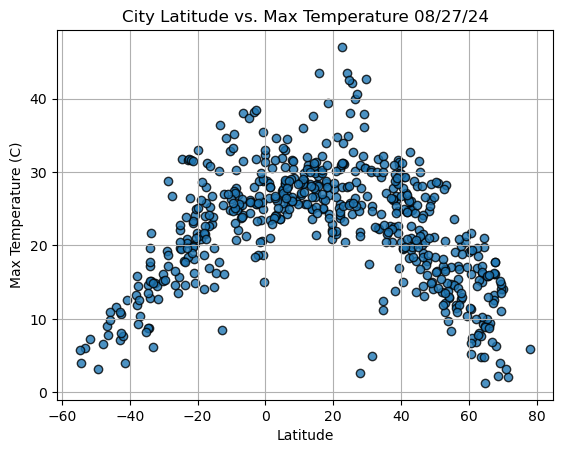

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

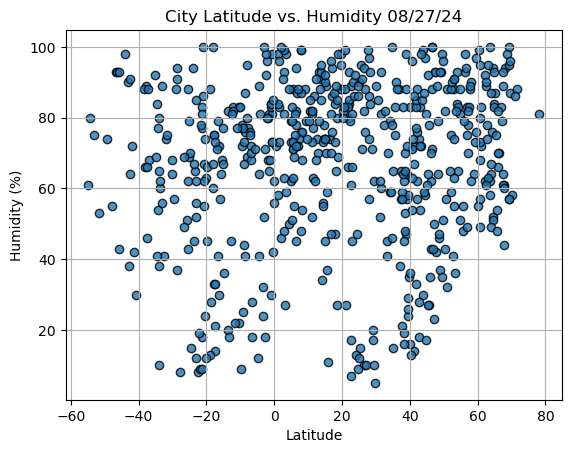

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

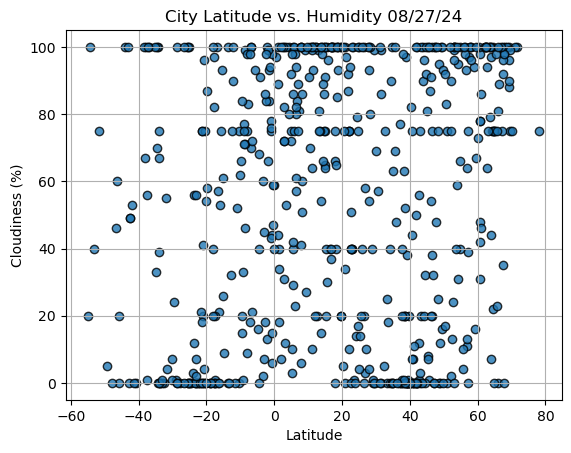

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

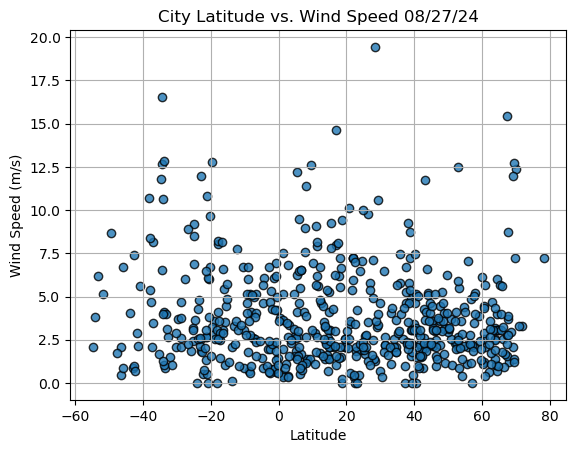

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            edgecolor = "black", 
            linewidths = 1, 
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Define regression values
    regress_values = x_values * slope + intercept

    # Create line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Annotate linear equation
    plt.annotate(line_eq, coordinates, fontsize = 15, color = "red")
    
    # Create scatter plot
    plt.scatter(x_values, y_values, color = "blue", alpha = 0.8, edgecolor = "black")
    
    # Create regression line
    plt.plot(x_values, regress_values, "r-")   
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{x_label} vs {y_label}')

    # Print r-squared value
    print(f"The r-squared is: {r_value**2}")
 
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pervomayskoye,43.9190,46.7102,28.80,30,90,6.61,RU,1724771570
2,wailua homesteads,22.0669,-159.3780,23.75,84,75,7.20,US,1724771572
3,palmer,42.1584,-72.3287,26.29,57,0,1.52,US,1724771573
5,longyearbyen,78.2186,15.6401,5.91,81,75,7.20,SJ,1724771575
7,poronaysk,49.2167,143.1167,15.00,93,100,1.14,RU,1724771577


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quatre cocos,-20.2078,57.7625,21.72,63,54,9.66,MU,1724771569
4,edinburgh of the seven seas,-37.0676,-12.3116,10.39,68,100,8.17,SH,1724771574
6,punta arenas,-53.1500,-70.9167,6.06,75,40,6.17,CL,1724771576
10,mar del plata,-38.0023,-57.5575,15.85,66,67,5.36,AR,1724771434
13,port-aux-francais,-49.3500,70.2167,3.12,74,5,8.65,TF,1724771584


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4873500908475748


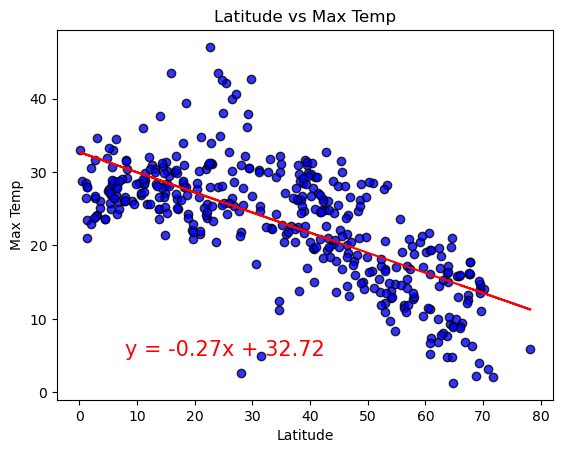

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Max Temp"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Max Temp" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (8, 5)) # Run function defined above      


The r-squared is: 0.5692238200701125


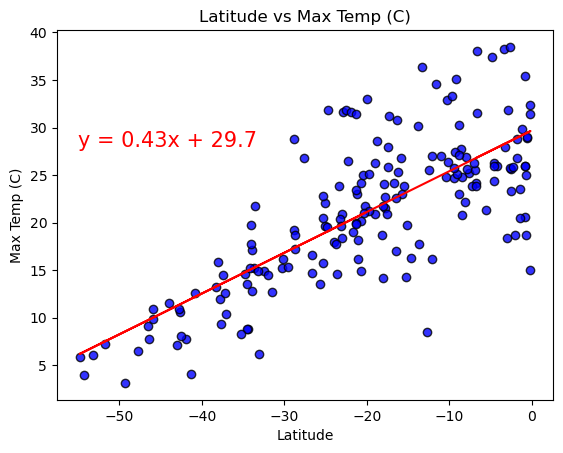

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 28))

**Discussion about the linear relationship:** The scatter plots  and the linear correlations above showcase the inverse linear relationships between latitude (x-axis) and maximum temperature (C) (y-axis) for the northern (top) and southern (bottom) hemispheres. Results show that, in the northern hemisphere, the maximum temperature decreases as latitude increases and moves away from the Equator (latitude = 0) and closer to Earth's North Pole. In contrast, the maximum temperature increases in the southern hemisphere as latitude gets closer to the Equator (latitude = 0), and moves away from Earth's South Pole. While the r-squared values indicate that the correlations can fluctuate between moderate to high for both hemispheres, the linear regressions suggest a relationship (positive and negative) between latitude and maximum temperature that is dependent on the hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00032282512243870593


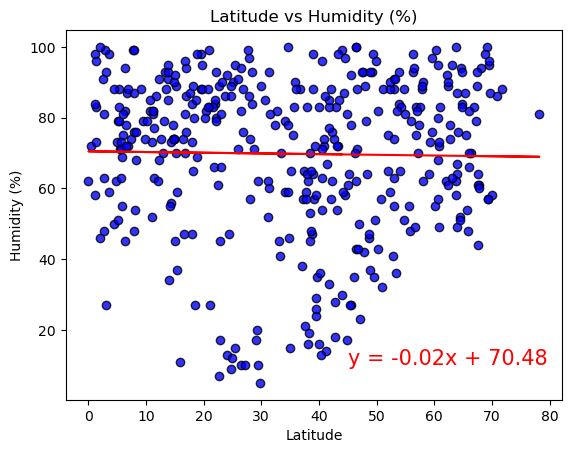

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Humidity"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Humidity (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (45, 10)) # Run function defined above     

The r-squared is: 0.0006406328273166276


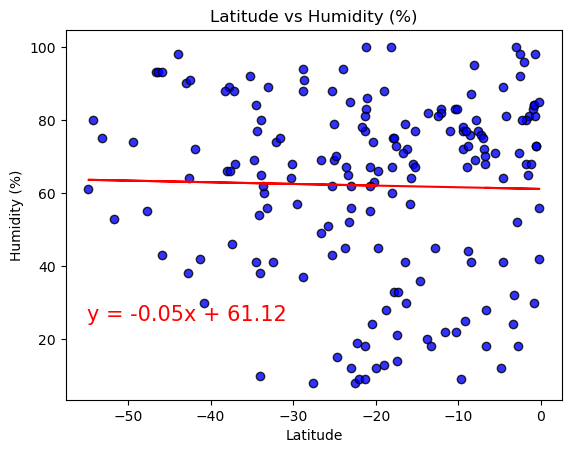

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Humidity"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Humidity (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 25)) # Run function defined above     

**Discussion about the linear relationship:** The scatter plots  and the linear correlations above showcase the linear relationships between latitude (x-axis) and humidity (%) (y-axis) for the northern (top) and southern (bottom) hemispheres. Interestingly, results show no specific relationship between latitude and percent humidity in the northern and southern hemispheres, as shown with the low slope and r-squared values.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 4.246690078687306e-05


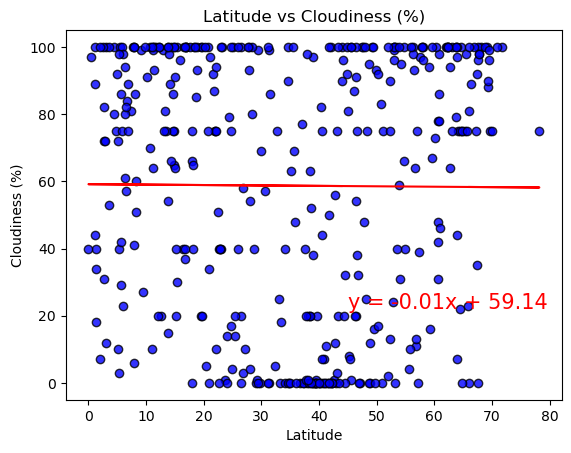

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Cloudiness"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Cloudiness (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (45, 22)) # Run function defined above   

The r-squared is: 0.026220826984582547


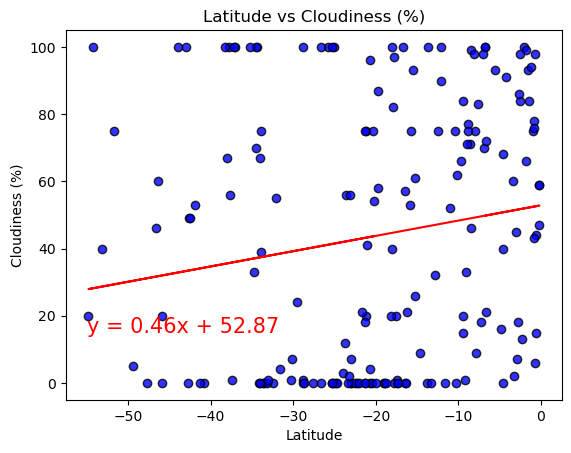

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Cloudiness"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Cloudiness (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 15)) # Run function defined above 

**Discussion about the linear relationship:** The scatter plots  and the linear correlations above showcase the linear relationships between latitude (x-axis) and cloudiness (%) (y-axis) for the northern (top) and southern (bottom) hemispheres. As with percent humidity, results show no specific relationship between latitude and percent cloudiness in the northern and southern hemispheres, as shown with the low slope and r-squared values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002428903568433996


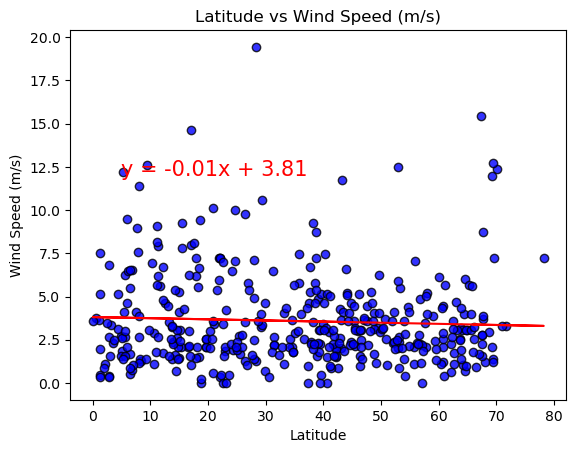

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Wind Speed"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Wind Speed (m/s)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (5, 12)) # Run function defined above 

The r-squared is: 0.029014807474155285


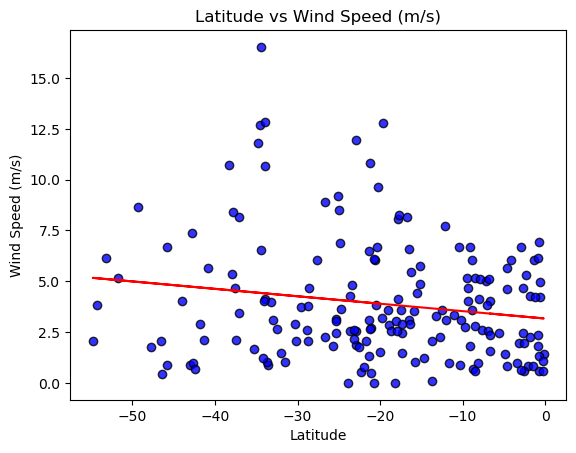

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Wind Speed"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Wind Speed (m/s)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 17.5)) # Run function defined above 

**Discussion about the linear relationship:** The scatter plots  and the linear correlations above showcase the linear relationships between latitude (x-axis) and wind speed (m/s) (y-axis) for the northern (top) and southern (bottom) hemispheres. As with percent humidity and cloudiness, results show no specific relationship between latitude and wind speed in the northern and southern hemispheres, as shown with the low slope and r-squared values.

In [ ]:
### END ###